In [2]:
# Loading the database
from keras.datasets import imdb
import numpy as np
# save np.load
np_load_old = np.load

# modify the default parameters of np.load
np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)

# call load_data with allow_pickle implicitly set to true
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

# restore np.load for future normal usage
np.load = np_load_old

C:\Users\Hrishi\Anaconda3\lib\site-packages\keras\datasets\imdb.py:99: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
C:\Users\Hrishi\Anaconda3\lib\site-packages\keras\datasets\imdb.py:100: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [3]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [4]:
train_labels[0]

1

In [5]:
# a look at the training data

max([max(sequence) for sequence in train_data])

9999

In [6]:
# word_index is a dictionary mapping words to an integer index
word_index = imdb.get_word_index()
# We reverse it, mapping integer indices to words
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
# We decode the review; note that our indices were offset by 3
# because 0, 1 and 2 are reserved indices for "padding", "start of sequence", and "unknown".
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

We cannot feed lists of integers into a neural network. We have to turn our lists into
tensors. There are two ways we could do that:

We could pad our lists so that they all have the same length, and turn them into an integer
tensor of shape (samples, word_indices), then use as first layer in our network a
layer capable of handling such integer tensors (the Embedding layer, which we will cover
in detail later in the book).


We could one-hot-encode our lists to turn them into vectors of 0s and 1s. Concretely, this
would mean for instance turning the sequence [3, 5] into a 10,000-dimensional vector
that would be all-zeros except for indices 3 and 5, which would be ones. Then we could
use as first layer in our network a Dense layer, capable of handling floating point vector
data.


We will go with the latter solution. Let’s vectorize our data, which we will do
manually for maximum clarity:

In [7]:
# encoding integar sequence to binary matrix 

def vectorize_sequences(sequences, dimension=10000):
    
    
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1. # set specific indices of results[i] to 1s
    return results
# Our vectorized training data
x_train = vectorize_sequences(train_data)
# Our vectorized test data
x_test = vectorize_sequences(test_data)

In [8]:
# an encoded example

x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [9]:
# encoding the labels

# Our vectorized labels
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [10]:
# our model defination

from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [11]:
# Note: What are activation functions and why are they
# necessary?
# Without an activation function like relu (also called a non-linearity), our
# Dense layer would consist of two linear operations, a dot product and an
# addition.
# output = dot(W, input) + b
# So the layer could only learn linear transformations (affine
# transformations) of the input data, i.e. the hypothesis space of the layer
# would be the set of all possible linear transformations of the input data
# into a 16-dimensional space. Such an hypothesis space is too restricted,
# and wouldn’t benefit from multiple layers of representations, because a
# deep stack of linear layers would still implement a linear operation: adding
# more layers wouldn’t extend the hypothesis space.
# In order to get access to a much richer hypothesis space that would
# benefit from deep representations, we need a non-linearity, or activation
# function. relu is the most popular activation function in deep learning, but
# there are many other candidates, which all come in similarly strange
# names such as prelu, elu, etc.

In [12]:
# compiling our model

model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['accuracy'])

In [13]:
# In order to monitor during training the accuracy of the model on data that it has never
# seen before, we will create a "validation set" by setting apart 10,000 samples from the
# original training data:

x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [14]:
# training our model

history = model.fit(partial_x_train,
partial_y_train,
epochs=20,
batch_size=512,
validation_data=(x_val, y_val))                    

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 25s 2ms/step - loss: 0.5084 - acc: 0.7813 - val_loss: 0.3797 - val_acc: 0.8684
Epoch 2/20
15000/15000 [==============================] - 3s 231us/step - loss: 0.3004 - acc: 0.9047 - val_loss: 0.3004 - val_acc: 0.8897
Epoch 3/20
15000/15000 [==============================] - 3s 228us/step - loss: 0.2179 - acc: 0.9285 - val_loss: 0.3085 - val_acc: 0.8711
Epoch 4/20
15000/15000 [==============================] - 3s 225us/step - loss: 0.1750 - acc: 0.9437 - val_loss: 0.2840 - val_acc: 0.8832
Epoch 5/20
15000/15000 [==============================] - 3s 228us/step - loss: 0.1427 - acc: 0.9543 - val_loss: 0.2841 - val_acc: 0.8872
Epoch 6/20
15000/15000 [==============================] - 3s 229us/step - loss: 0.1150 - acc: 0.9650 - val_loss: 0.3166 - val_acc: 0.8772
Epoch 7/20
15000/15000 [==============================] - 3s 224us/step - loss: 0.0980 - acc: 0.9705 - val_loss: 0.3127 - v

In [15]:
# Note that the call to model.fit() returns a History object. This object has a
# member history, which is a dictionary containing data about everything that happened
# during training. Let’s take a look at it:

history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

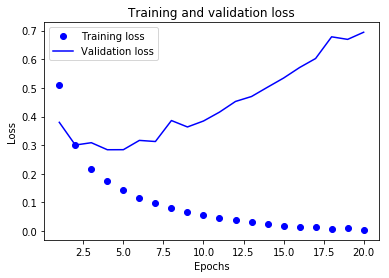

In [17]:
# plotting the training and validation loss

import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

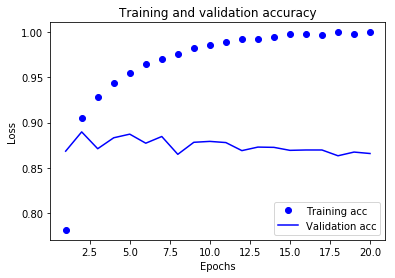

In [18]:
# plotting the training and validation accuracy

plt.clf() # clear figure
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [19]:
# generating predictions on new data

model.predict(x_test)

array([[0.00524432],
       [0.9999999 ],
       [0.9109159 ],
       ...,
       [0.00158695],
       [0.00558546],
       [0.46247122]], dtype=float32)